In [172]:
import numpy as np
import pandas as pd

In [173]:
from tensorflow.keras.models import Sequential, model_from_json

In [174]:
from tensorflow import keras
label = keras.models.load_model('models/Label.h5')
gen = keras.models.load_model('modelsgen.h5')


In [175]:
classes=['Rock',      'Ice',   'Poison',   'Flying',
         'Dragon',  'Psychic',   'Ground',    'Fairy',   'Normal',     'Fire',
          'Water',    'Ghost', 'Electric',      'Bug',    'Steel',     'Dark',
          'Grass', 'Fighting']

In [176]:
gen.summary()

Model: "GEN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 115200)            11635200  
                                                                 
 batch_normalization (BatchN  (None, 115200)           460800    
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 115200)            0         
                                                                 
 reshape (Reshape)           (None, 15, 15, 512)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 30, 30, 256)      2097408   
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 256)      1024    

1/1 [==============================] - 0s 83ms/step
(120, 120, 3)
1/1 [==============================] - 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.32432557e-03 1.64515048e-03 1.66852593e-01 4.65509994e-03
 1.48362631e-03 2.11159524e-04 1.03971888e-05 1.09761134e-01
 2.12602373e-02 4.28170972e-02 1.14712736e-03 3.97675067e-01
 7.51265252e-05 1.71121612e-01 4.67906328e-04 7.21495673e-02
 1.99901219e-03 5.34375012e-03]
Ghost (0.398)
Bug (0.171)


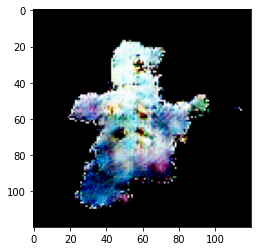

In [199]:
import tensorflow as tf
import matplotlib.pyplot as plt

LATENT_DIM=100
random_noise = tf.random.normal([1,LATENT_DIM])
# for i in range(10):
img=gen.predict(random_noise)
img=img.reshape(120,120,3)
classes = np.array(classes)
print(img.shape)
proba = label.predict(img.reshape(1,120,120,3))
print(proba[0])
top_2 = np.argsort(proba[0])[:-3:-1]
for i in range(2):
    print("{}".format(classes[top_2[i]])+" ({:.3})".format(proba[0][top_2[i]]))
plt.imshow(img)

In [178]:
# class DCGAN(keras.Model):
#     def __init__(self, generator, discriminator, latent_dim):
#         super().__init__()
#         self.generator = generator
#         self.discriminator = discriminator
#         self.latent_dim = latent_dim
#         self.g_loss_metric = keras.metrics.Mean(name="g_loss")
#         self.d_loss_metric = keras.metrics.Mean(name="d_loss")

# #   @property
#     def metrics(self):
#         return [self.g_loss_metric, self.d_loss_metric]

#     def compile(self, g_optimizer, d_optimizer, loss_fn):
#         super(DCGAN, self).compile()
#         self.g_optimizer = g_optimizer
#         self.d_optimizer = d_optimizer
#         self.loss_fn = loss_fn

#     def train_step(self, real_images):
#         #get batch size
#         batch_size = tf.shape(real_images)[0] 
#         random_noise = tf.random.normal(shape=(batch_size, self.latent_dim)) # for gen

#         # Training the discriminator Model
#         with tf.GradientTape() as tape:
#         #compute loss on each ---> Real Image
#             pred_real = self.discriminator(real_images, training=True) # gives val b/w 0 -> 1
#             #1-> Real 0-> Fake

#             real_labels = tf.ones((batch_size, 1))
#             real_labels += 0.05 * tf.random.uniform(tf.shape(real_labels)) # Label Smoothing
#             d_loss_real = self.loss_fn(real_labels, pred_real)



#             #compute loss on each ---> Real Image
#             fake_images = self.generator(random_noise)
#             pred_fake = self.discriminator(fake_images, training=True)
            
#             fake_labels = tf.zeros((batch_size, 1)) # No smoothing needed
#             d_loss_fake = self.loss_fn(fake_labels, pred_fake)
            

#             # Sum Losses
#             d_loss = (d_loss_real + d_loss_fake) / 2

#         grads = tape.gradient(d_loss, self.discriminator.trainable_variables)
#         self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_variables))

#         # Train the gen Model

#         labels = tf.ones((batch_size, 1))
#         with tf.GradientTape() as tape:
#         # gen fake images
#             fake_images = self.generator(random_noise, training=True) 
#             pred_fake = self.discriminator(fake_images, training=True)
            

#             g_loss = self.loss_fn(labels, pred_fake) 
#         grads = tape.gradient(g_loss, self.generator.trainable_variables)
#         self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))

#         self.d_loss_metric.update_state(d_loss)
#         self.g_loss_metric.update_state(g_loss)

#         return {'d_loss':self.d_loss_metric.result(), 'g_loss': self.g_loss_metric.result()}

In [179]:
# from keras.callbacks import ModelCheckpoint

# class DCGANMonitor(keras.callbacks.Callback):
#   def __init__(self, num_imgs=25, latent_dim=100):
#     self.num_imgs=num_imgs
#     self.latent_dim=latent_dim
#     self.noise = tf.random.normal([25, latent_dim]) 

#   def on_epoch_end(self, epoch, logs=None):
#     g_img = self.model.generator(self.noise)

#     g_img = (g_img + 127.5) * 127.5
#     g_img.numpy()


#     fig = plt.figure(figsize=(8, 8))
#     for i in range(self.num_imgs):
#       plt.subplot(5,5,i+1)
#       img = array_to_img(g_img[i])
#       plt.imshow(img)
#       plt.axis("off")
      
#     plt.show()

#     def on_train_end(self, logs=None):
# #         checkpoint_path = "training_1/cp.ckpt"
# #         checkpoint_dir = os.path.dirname("/kaggle/working/")

# #         # Create a callback that saves the model's weights
# #         cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
# #                                                          save_weights_only=True,
# #                                                          verbose=1)
#         # callback = [checkpoint]
#         self.model.generator.save('generator.h5')


In [180]:
# dcgan = DCGAN(generator=generator, discriminator=discriminator, latent_dim=LATENT_DIM)    

NameError: name 'generator' is not defined